# Financial Econometrics II: Methods to measure risks

## Value at Risk (VaR)

### Import libs

In [1]:
import pandas as pd
import numpy as np
import yfinance as yf
import matplotlib.pyplot as plt
from scipy.stats import norm

## Build Portfolio

To compute the Value at Risk (VaR) we have to build a portfolio. To constitute the portfolio, we propose to select companies with differents market capitalization.

Market capitalization is typically expressed in terms of billions (B), millions (M), or even trillions (T) of dollars, depending on the size of the company. It categorizes companies into different size classes:

Large-Cap (Large Capitalization): Market cap typically over 10 billions dollars.
Mid-Cap (Medium Capitalization): Market cap typically between 2 billions and 10 billion dollars.
Small-Cap (Small Capitalization): Market cap typically under 2 billions dollars.

Market capitalization is an important metric for investors, analysts, and researchers as it provides insights into the size and scale of a company. It's widely used for categorizing stocks and understanding their relative risk and growth potential.

According these three size classes we select the following companies:

**Large Cap stocks (> $10 billions)**
* LVMH (MC.PA) -> Luxury
* Schneider Electric (SU.PA) -> Enery
* Crédit Agricole (ACA.PA) -> Financial

**Mid Cap Stocks (between 10 billions and $2 billions)**
* Teleperformance (TEP.PA) -> Consulting
* Rexel (RXL.PA) -> Manufacturer
* Klépierre (LI.PA) -> Real Estate


**Small Cap Stocks (< $2 billions)**
* Icade (ICAD.PA) -> Real Esatate
* Rubis (RUI.PA) -> Energy
* BIC (BB.PA) -> Manufacturer

In [2]:
import yfinance as yf
import pandas as pd

def download_stock_prices(tickers, start_date, end_date):
    """
    Function to download stock prices for the specified tickers and time period,
    and resample the data to monthly frequency.

    Parameters:
    - tickers: List of ticker symbols
    - start_date: Start date in 'YYYY-MM-DD' format
    - end_date: End date in 'YYYY-MM-DD' format

    Returns:
    - DataFrame containing the adjusted closing prices resampled to monthly frequency
    """
    # Download adjusted closing prices
    portfolio = yf.download(tickers, start=start_date, end=end_date)['Adj Close']
    
    # Resample the data to monthly frequency
    monthly_portfolio = portfolio.resample('M').ffill()
    
    return monthly_portfolio

# Example usage:
start_date = '2008-01-01'
end_date = '2018-12-31'
tickers = ['MC.PA', 'SU.PA', 'ACA.PA', 'TEP.PA', 'RXL.PA', 'LI.PA', 'ICAD.PA', 'RUI.PA', 'BB.PA']
df_portfolio = download_stock_prices(tickers, start_date, end_date)

df_portfolio

[*********************100%%**********************]  9 of 9 completed


,ACA.PA,BB.PA,ICAD.PA,LI.PA,MC.PA,RUI.PA,RXL.PA,SU.PA,TEP.PA
Date,,,,,,,,,
2008-01-31,8.697126,23.658129,29.529324,14.480270,49.827072,6.881586,6.886359,24.019999,16.052969
2008-02-29,7.657205,23.624208,32.301468,15.768579,49.608955,6.696016,6.662152,23.583956,16.168623
2008-03-31,8.319359,22.080919,32.459877,15.797032,51.259434,6.364127,7.149001,25.527477,18.165602
2008-04-30,9.189495,18.587320,33.199574,16.432415,53.382507,6.806643,6.681370,25.558086,20.432447
2008-05-31,7.755823,18.854210,33.626228,15.982847,55.586857,7.275329,7.552573,26.250610,20.987593
...,...,...,...,...,...,...,...,...,...
2018-08-31,8.567968,64.220749,53.556919,22.120720,278.956055,39.155975,12.189001,61.940666,156.155869
2018-09-30,9.005672,63.495998,50.721371,21.855843,281.218018,35.793167,11.635775,61.111732,153.325241
2018-10-31,8.236417,68.126335,47.726517,21.476427,248.166077,35.086823,10.138012,56.402683,137.379440


### Compute the portfolio return

Regarding the distribution of our assets’ weights we choose to set equal weight to two assets.

**Important note:**

As our portfolio contains two assets, we set for all assets the same weight: $\frac{1}{9} = 0.11$. 

To do so, we use the following formula:

1. Compute the return of each asset by applying the following formula
$$
\text{Percentage Change} = \frac{\text{Final Value} - \text{Initial Value}}{\text{Initial Value}} \times 100\%
$$

2. Build the total daily portfolio return using the weights associated to each asset
$$
E_p = w_1 E_1 + w_2 E_2 + ... + w_N E_N
$$

where $w_n$ refers to the portfolio wieght of each asset and $E_n$ its expected return

In [3]:
def compute_monthly_portfolio_returns(portfolio):
    
    # Calculate monthly returns for each stock
    monthly_returns = portfolio.pct_change().dropna()

    # Calculate equal weights for each stock
    num_stocks = len(portfolio.columns)
    equal_weights = 1 / num_stocks

    # Calculate total portfolio return based on equal weighting
    portfolio_monthly_returns = (monthly_returns * equal_weights).sum(axis=1)

    # Create a new DataFrame for the portfolio returns
    df_portfolio_monthly_returns = pd.DataFrame(portfolio_monthly_returns, columns=['Portfolio Return'])
    
    return df_portfolio_monthly_returns, monthly_returns

df_portfolio_monthly_returns, df_stocks_monthly_returns = compute_monthly_portfolio_returns(df_portfolio)

df_portfolio_monthly_returns

,Portfolio Return
Date,
2008-02-29,-0.001445
2008-03-31,0.032284
2008-04-30,0.020101
2008-05-31,0.015405
2008-06-30,-0.125890
...,...
2018-08-31,0.004338
2018-09-30,-0.019977
2018-10-31,-0.059549


In [4]:
df_stocks_monthly_returns

,ACA.PA,BB.PA,ICAD.PA,LI.PA,MC.PA,RUI.PA,RXL.PA,SU.PA,TEP.PA
Date,,,,,,,,,
2008-02-29,-0.119571,-0.001434,0.093878,0.088970,-0.004377,-0.026966,-0.032558,-0.018153,0.007205
2008-03-31,0.086475,-0.065327,0.004904,0.001804,0.033270,-0.049565,0.073077,0.082409,0.123510
2008-04-30,0.104592,-0.158218,0.022788,0.040222,0.041418,0.069533,-0.065412,0.001199,0.124788
2008-05-31,-0.156012,0.014359,0.012851,-0.027359,0.041293,0.068857,0.130393,0.027096,0.027170
2008-06-30,-0.173034,0.050277,-0.202903,-0.158780,-0.114745,-0.060733,-0.213206,-0.150235,-0.109651
...,...,...,...,...,...,...,...,...,...
2018-08-31,-0.019226,-0.024465,0.015097,-0.042454,0.011042,0.010902,0.012327,0.020337,0.055485
2018-09-30,0.051086,-0.011285,-0.052945,-0.011974,0.008109,-0.085882,-0.045387,-0.013383,-0.018127
2018-10-31,-0.085419,0.072923,-0.059045,-0.017360,-0.117531,-0.019734,-0.128720,-0.077056,-0.104000


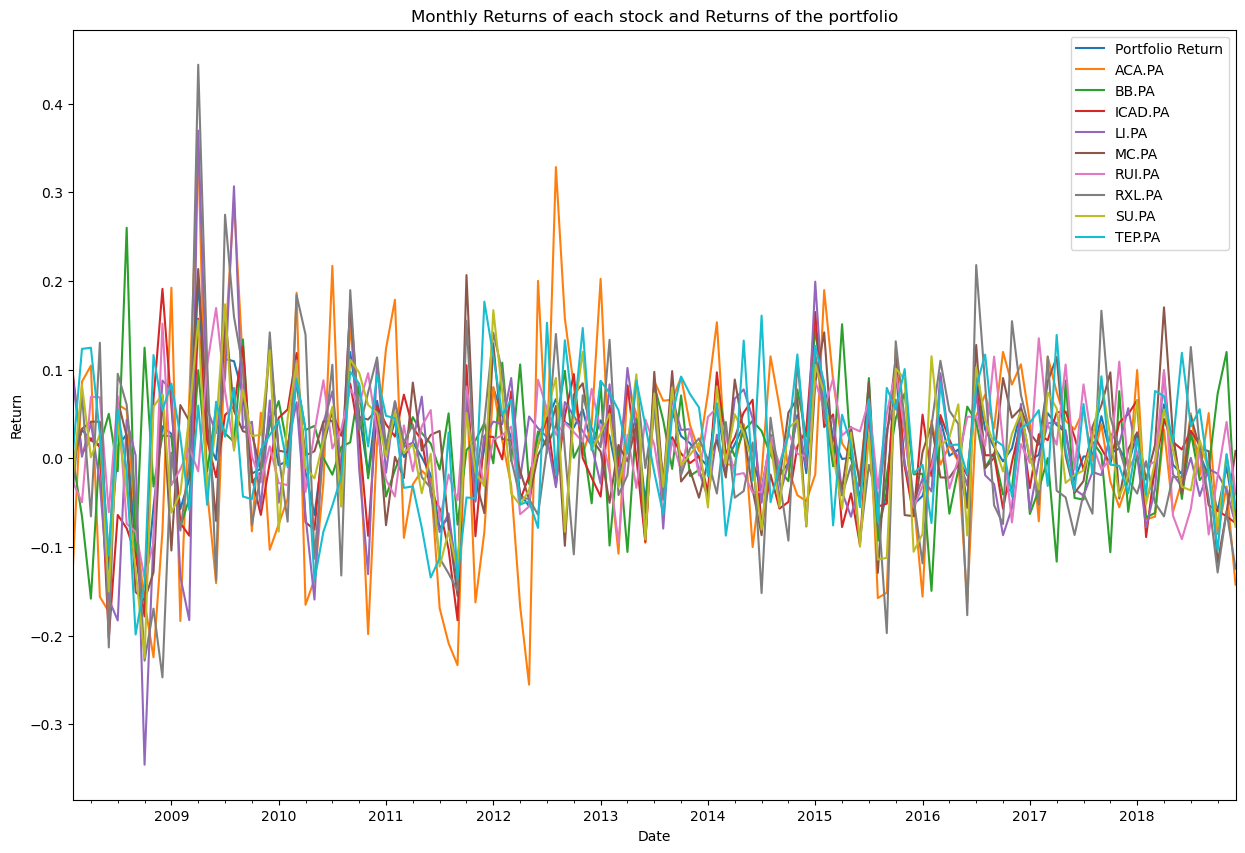

In [5]:
merged_df = df_portfolio_monthly_returns.merge(df_stocks_monthly_returns, left_index=True, right_index=True)
merged_df.plot(figsize=(15, 10))
plt.title("Monthly Returns of each stock and Returns of the portfolio")
plt.xlabel("Date")
plt.ylabel("Return")
plt.show()

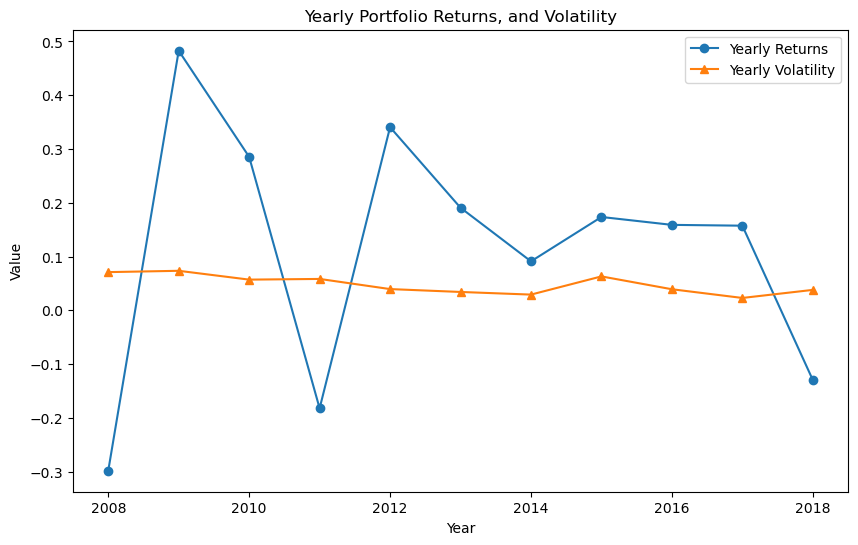

In [6]:
def plot_yearly_vol_returns(portfolio_returns):

    # Calculate yearly returns
    yearly_returns = portfolio_returns.resample('Y').sum()

    # Calculate yearly volatility of returns
    yearly_volatility = portfolio_returns.resample('Y').std()

    # Plotting
    plt.figure(figsize=(10, 6))

    # Plot yearly returns
    plt.plot(yearly_returns.index.year, yearly_returns['Portfolio Return'], label='Yearly Returns', marker='o')

    # Plot yearly volatility of returns
    plt.plot(yearly_volatility.index.year, yearly_volatility['Portfolio Return'], label='Yearly Volatility', marker='^')

    # Adding labels and legend
    plt.title('Yearly Portfolio Returns, and Volatility')
    plt.xlabel('Year')
    plt.ylabel('Value')
    plt.legend()

    # Show plot
    plt.show()

plot_yearly_vol_returns(df_portfolio_monthly_returns)

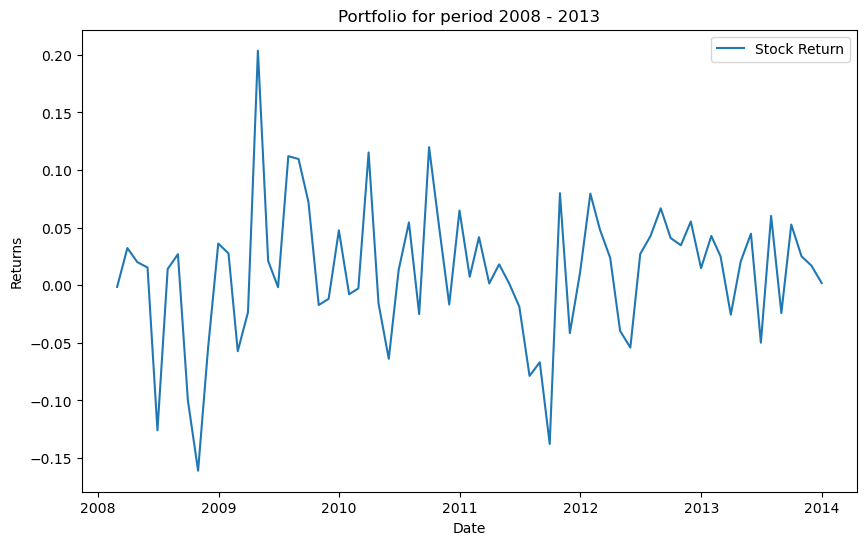

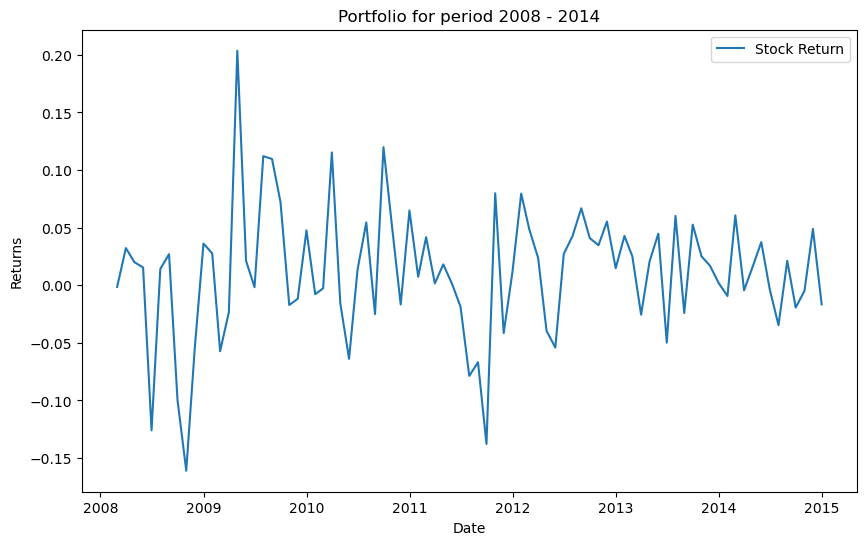

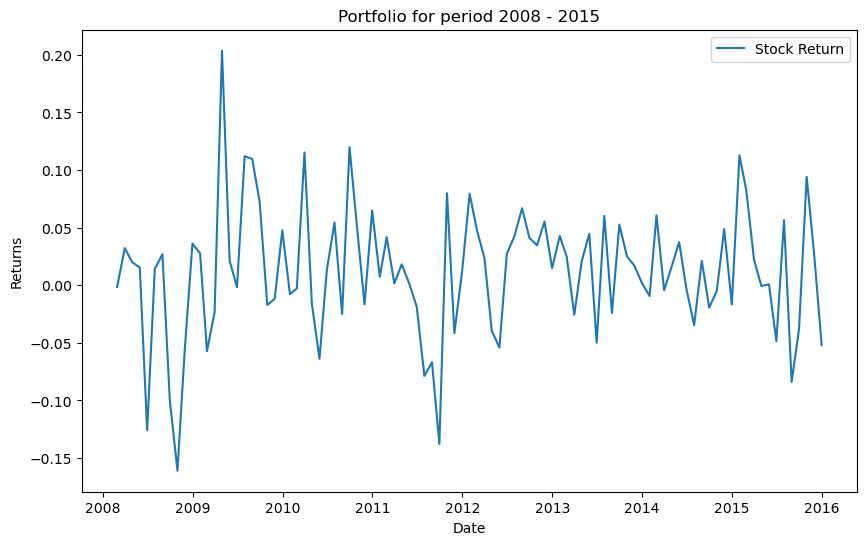

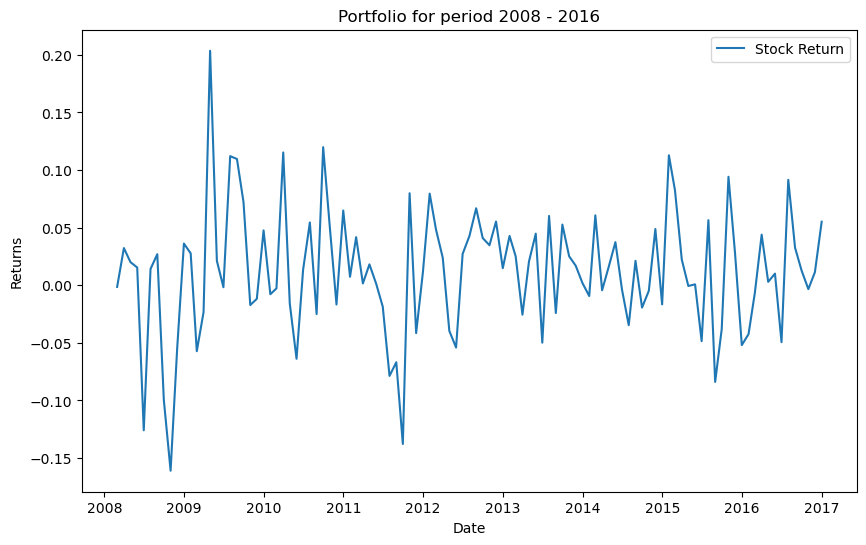

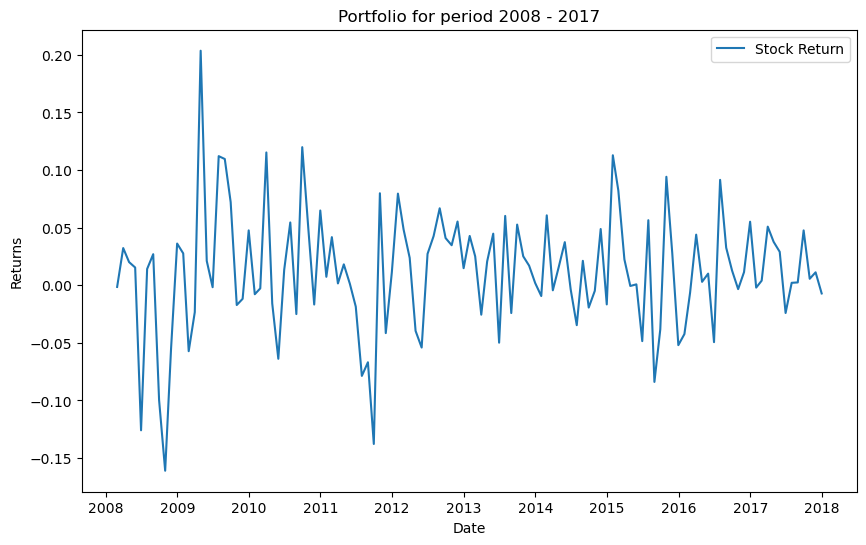

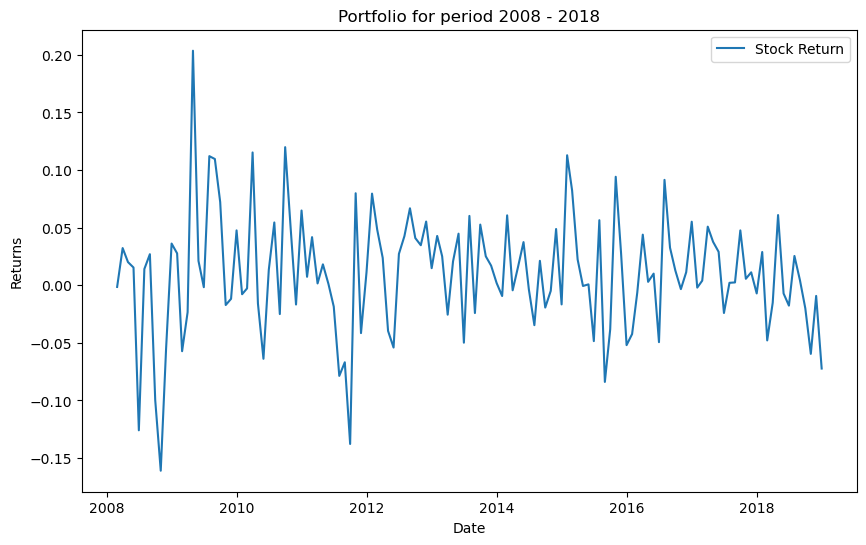

In [7]:
def split_by_year(df):
    """
    Function to split DataFrame into separate DataFrames for each year.

    Parameters:
    - df: DataFrame containing portfolio returns

    Returns:
    - List of DataFrames, each containing portfolio returns for a single year
    """
    # Define the list of periods
    periods = ['2013', '2014', '2015', '2016', '2017', '2018']

    # Initialize an empty list to store DataFrames for each period
    df_portfolio_list = []

    # Iterate over each period and calculate the cumulative returns
    for period in periods:
        end_date = period + '-12-31'
        df_period = df.loc[:end_date]
        df_portfolio_list.append(df_period)
    return df_portfolio_list
    


df_portfolio_list = split_by_year(df_portfolio_monthly_returns)


def plot_stock_return_and_volatility(dataframes):
    """
    Function to plot stock returns and volatility for each dataframe in a list.

    Parameters:
    - dataframes: List of DataFrames, each containing stock returns for a single year
    """
    for i, df in enumerate(dataframes):
        year = df.index.year[-1]  # Extract the year from the index of the first row
        plt.figure(figsize=(10, 6))
        plt.plot(df.index, df['Portfolio Return'], label='Stock Return')
        plt.title(f'Portfolio for period 2008 - {year}')
        plt.xlabel('Date')
        plt.ylabel('Returns')
        plt.legend()
        plt.show()

# Example usage:
plot_stock_return_and_volatility(df_portfolio_list)

df_monthly_returns_portfolio_2008_2013 = df_portfolio_list[0]
df_monthly_returns_portfolio_2008_2014 = df_portfolio_list[1]
df_monthly_returns_portfolio_2008_2015 = df_portfolio_list[2]
df_monthly_returns_portfolio_2008_2016 = df_portfolio_list[3]
df_monthly_returns_portfolio_2008_2017 = df_portfolio_list[4]
df_monthly_returns_portfolio_2008_2018 = df_portfolio_list[5]

#### Compute the mean and standard deviation (volatility) of our portfolio

To compute the volatility of our portfolio we refer to the following formula

$$
\sigma_p = \sqrt{w_1^2 \sigma_1^2 + w_2^2 \sigma_2^2 + 2w_1w_2 Cov_{1,2} \sigma_1 \sigma_2}
$$

where $w_n$ refers to the portfolio weight of each asset, $\sigma_n^2$ its variance, and $Cov_{1,2}$ the covariance between the 2 assets.


In [8]:
def compute_portfolio_mean_volatility(portfolio_returns):
    mean_returns = portfolio_returns.mean()[0]  # Mean of the return distribution
    vol_returns = portfolio_returns.std()[0]
    return mean_returns, vol_returns

mean_portfolio_returns_2008_2013, vol_portfolio_returns_2008_2013 = compute_portfolio_mean_volatility(df_monthly_returns_portfolio_2008_2013)
mean_portfolio_returns_2008_2014, vol_portfolio_returns_2008_2014 = compute_portfolio_mean_volatility(df_monthly_returns_portfolio_2008_2014)
mean_portfolio_returns_2008_2015, vol_portfolio_returns_2008_2015 = compute_portfolio_mean_volatility(df_monthly_returns_portfolio_2008_2015)
mean_portfolio_returns_2008_2016, vol_portfolio_returns_2008_2016 = compute_portfolio_mean_volatility(df_monthly_returns_portfolio_2008_2016)
mean_portfolio_returns_2008_2017, vol_portfolio_returns_2008_2017 = compute_portfolio_mean_volatility(df_monthly_returns_portfolio_2008_2017)
mean_portfolio_returns_2008_2018, vol_portfolio_returns_2008_2018 = compute_portfolio_mean_volatility(df_monthly_returns_portfolio_2008_2018)

print("Print the mean and volatility of our portfolio for 2008-2013")
print("mean: " + str(round(mean_portfolio_returns_2008_2013, 4)) + " \nvol: " + str(round(vol_portfolio_returns_2008_2013, 4)))
      
print("\n Print the mean and volatility of our portfolio for 2008-2014")
print("mean: " + str(round(mean_portfolio_returns_2008_2014, 4)) + " \nvol: " + str(round(vol_portfolio_returns_2008_2014, 4)))

print("\n Print the mean and volatility of our portfolio for 2008-2015")
print("mean: " + str(round(mean_portfolio_returns_2008_2015, 4)) + " \nvol: " + str(round(vol_portfolio_returns_2008_2015, 4)))

print("\n Print the mean and volatility of our portfolio for 2008-2016")
print("mean: " + str(round(mean_portfolio_returns_2008_2016, 4)) + " \nvol: " + str(round(vol_portfolio_returns_2008_2016, 4)))

print("\n Print the mean and volatility of our portfolio for 2008-2017")
print("mean: " + str(round(mean_portfolio_returns_2008_2017, 4)) + " \nvol: " + str(round(vol_portfolio_returns_2008_2017, 4)))

print("\n Print the mean and volatility of our portfolio for 2008-2018")
print("mean: " + str(round(mean_portfolio_returns_2008_2018, 4)) + " \nvol: " + str(round(vol_portfolio_returns_2008_2018, 4)))

mean_portfolio_list = [mean_portfolio_returns_2008_2013, 
                       mean_portfolio_returns_2008_2014, 
                       mean_portfolio_returns_2008_2015,
                       mean_portfolio_returns_2008_2016, 
                       mean_portfolio_returns_2008_2017,
                       mean_portfolio_returns_2008_2018
                      ]

vol_portfolio_list = [vol_portfolio_returns_2008_2013, 
                       vol_portfolio_returns_2008_2014, 
                       vol_portfolio_returns_2008_2015,
                       vol_portfolio_returns_2008_2016, 
                       vol_portfolio_returns_2008_2017,
                       vol_portfolio_returns_2008_2018
                      ]

Print the mean and volatility of our portfolio for 2008-2013
mean: 0.0115 
vol: 0.0603

 Print the mean and volatility of our portfolio for 2008-2014
mean: 0.011 
vol: 0.0567

 Print the mean and volatility of our portfolio for 2008-2015
mean: 0.0114 
vol: 0.0572

 Print the mean and volatility of our portfolio for 2008-2016
mean: 0.0116 
vol: 0.0554

 Print the mean and volatility of our portfolio for 2008-2017
mean: 0.0118 
vol: 0.0529

 Print the mean and volatility of our portfolio for 2008-2018
mean: 0.0097 
vol: 0.052


##### We note that the portfolio's volatility and returns are virtually identical between each of the analysis periods.

### What is VaR?

The VaR(5%) of USD10,000 indicates that here is a 5% chance that on any given day, the portfolio will experience a loss of USD10,000 or more.

We could also say that there is a 95% chance that on any given day the portfolio will experience either a loss less than USD 10,000 or a gain.

If we further assume that the USD 10,000 loss represents 8% of the portfolio value, then on any given day there is a 5% chance that the portfolio will experience a loss of 8% or greater, but there is a 95%
chance that the loss will be less than 8% or a percentage gain greater than zero.

A VaR measure is typically estimated with three approaches. Let's first see the parametric approach, which requires specific assumptions regarding the asset returns distribution - for example, that they are normally distributed.

In this study, we will review the different methods for calculating VaR.

Broadly speaking, there are 3 different methods for deriving the VaR of a portfolio:

* **Parametric approach:**  The methods relies to the Variance-Covariance method under the assumption that the returns are normally distributed. To be more preceise, it exists two methods to compute the VaR with parametric approcach, one method refers to the the Simple Moving Average (SMA) and the other method refer to the Equal Weighted Moving Aaverage methods (EWMA).
* **Non parametric approach:** The method relies on historical data (past data) to estimate the VaR.
* **Monte Carlo approach:** The methods relies on the Monte Carlo simualtion approach to estimate the VaR.

The goal of this study is for each of the approaches below, to calculate the daily VaR (10%) hence at a confidence level of 90% of our portfolio for each periods ([2008, 2014], ..., [2008, 2018]). In addition, let's say that the initial investment is 10 000 €.
To do so, we proceed as follow: 
* We explain the methodology, 
* Plot the result, 
* Comment the result
* Compare the results of the different approaches

The approach are the following:

* A/ parametric approach using SMA
* B/ parametric approach using EWMA assign a number totoλ𝜖[0,1]based on the volatility of your data, explain your reasoning
* C/ Non-parametric approach
* D) Hybrid approach
* E) Monte Carlo simulation

## A/ Parametric Approach 1# : Simple Moving Average (SMA)
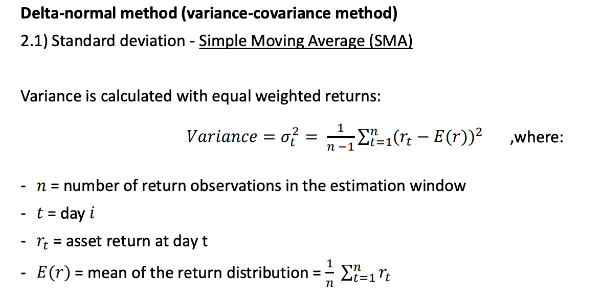

The SMA approach gives equal importance to all observations used in the look back period and does not account for the fact that information tends to decay or become less relevant over time.


Daily VaR at 10% confidence level (Parametric SMA): 772.15€


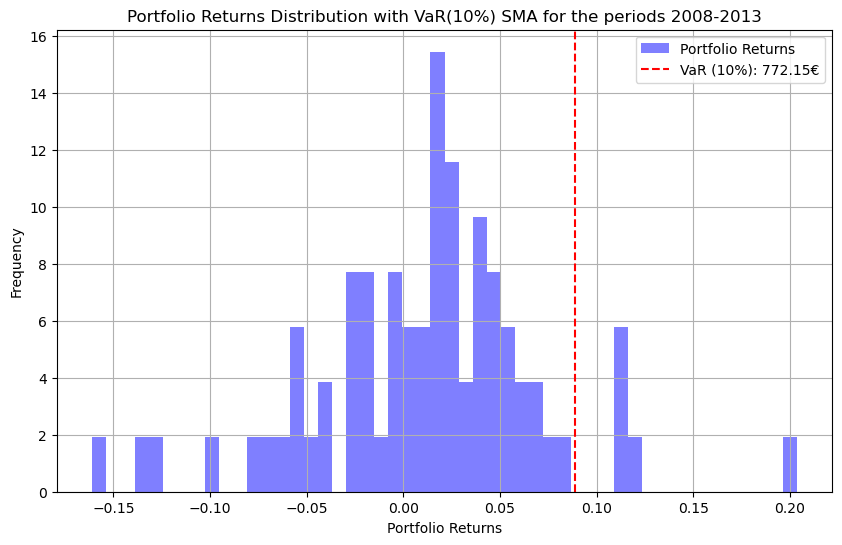




Daily VaR at 10% confidence level (Parametric SMA): 726.80€


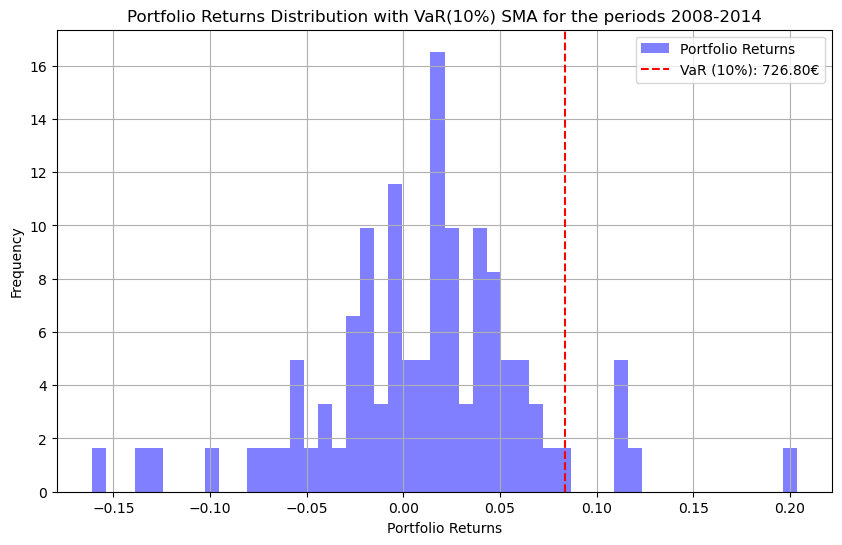




Daily VaR at 10% confidence level (Parametric SMA): 733.27€


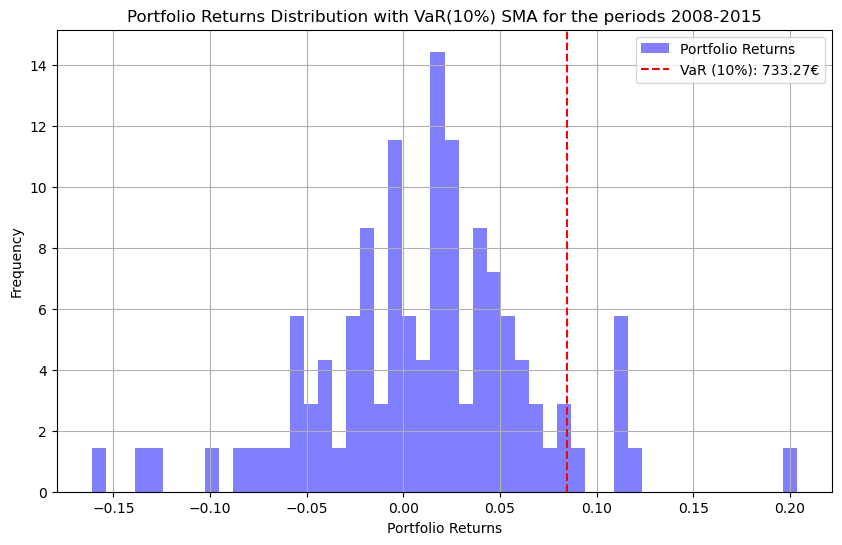




Daily VaR at 10% confidence level (Parametric SMA): 709.36€


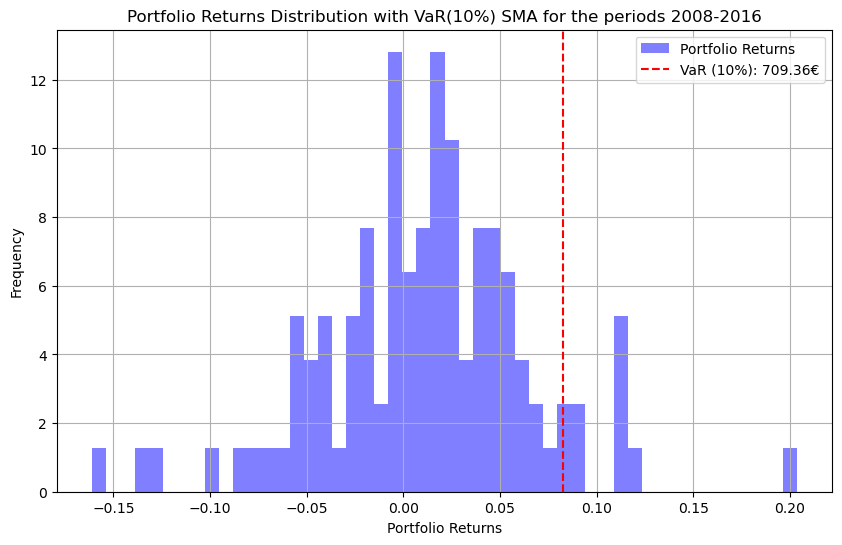




Daily VaR at 10% confidence level (Parametric SMA): 678.40€


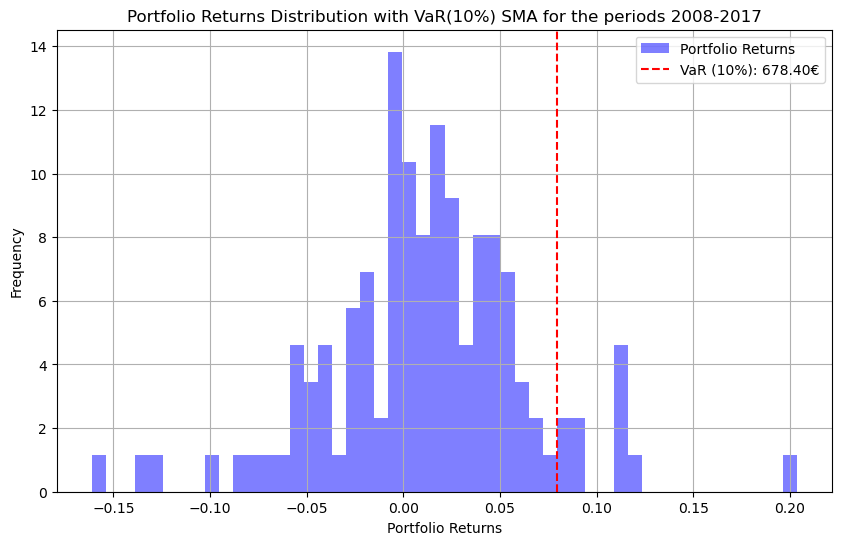




Daily VaR at 10% confidence level (Parametric SMA): 667.01€


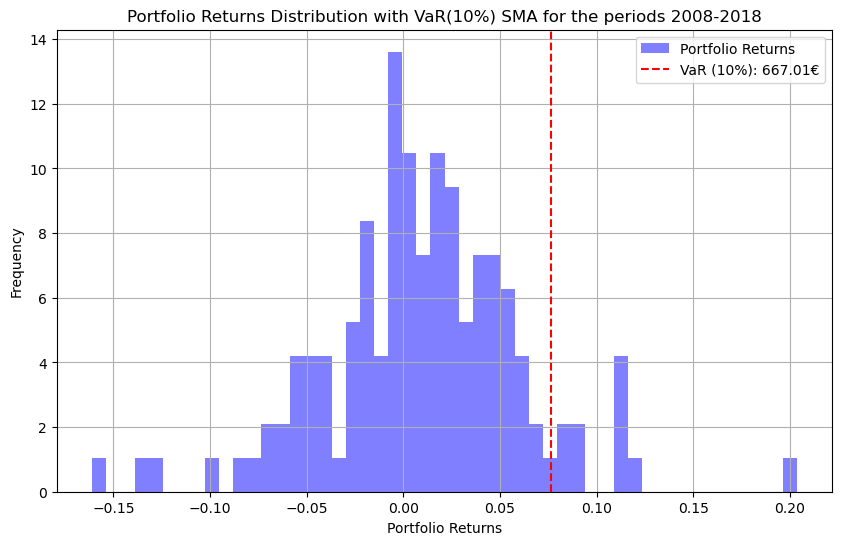

In [9]:
def plot_returns_distribution_with_var(portfolio_returns, var_eur, initial_portfolio_value):
    #Plot the distribution of portfolio returns with VaR line.
    year = portfolio_returns.index.year[-1]  # Extract the year from the index of the first row
    plt.figure(figsize=(10, 6))
    plt.hist(portfolio_returns, bins=50, density=True, alpha=0.5, color='blue', label='Portfolio Returns')
    mean_return = np.mean(portfolio_returns)
    plt.axvline(mean_return - var_eur/initial_portfolio_value, color='red', linestyle='--', label=f'VaR (10%): {abs(var_eur):.2f}€')
    plt.xlabel('Portfolio Returns')
    plt.ylabel('Frequency')
    plt.title('Portfolio Returns Distribution with VaR(10%) SMA for the periods 2008-'+ str(year))
    plt.grid(True)
    plt.legend()
    plt.show()
    
def compute_var_SMA(portfolio_returns, portfolio_volatility, initial_portfolio_value, confidence_level=0.1):   
    #Calculate the daily Value at Risk (VaR) at a given confidence level using the parametric approach."""
    z_value = norm.ppf(1 - confidence_level)
    var_SMA = z_value * portfolio_volatility
    # Calculate the daily VaR (10%) using the parametric approach with SMA
    var_eur = - var_SMA * initial_portfolio_value
    
    # Print the daily VaR at 10% confidence level
    print(f"Daily VaR at 10% confidence level (Parametric SMA): {abs(var_eur):.2f}€")
    
    return var_SMA, var_eur

initial_portfolio_value = 10000

var_SMA_list = list()
var_SMA_eur_list = list()

for i, df_portfolio_returns in enumerate(df_portfolio_list, 0):
    var_SMA, var_SMA_eur = compute_var_SMA(df_portfolio_returns, vol_portfolio_list[i], initial_portfolio_value)
    var_SMA_list.append(var_SMA)
    var_SMA_eur_list.append(var_SMA_eur)
    plot_returns_distribution_with_var(df_portfolio_returns, var_SMA_eur, initial_portfolio_value)
    print("\n\n")    

Comments:
The histogram illustrates the distribution of portfolio returns, and the red dotted line represents the VaR at a 90% confidence level.

The VaR (10%) indicates the potential loss threshold that is not expected to be exceeded with a probability of 10% over the specified holding period.

For example, for the the period 2008-2014. If the portfolio is equal-weighted, we have a 10% confidence level daily "Value at Risk" (VaR) of **€772.15**. This means that, under normal market conditions, there is 90% confidence (or a 90% probability) that the maximum loss your portfolio could sustain in one month will not exceed **€772.15**. Conversely, it also means that there is a 10% chance that the loss will exceed this amount

# Parametric Approch #2 : Exponentially Weighted Moving Average (EWMA)

The EWMA method, on contrary to SMA method, gives more importance to recent information and hence places greater weight on more recent returns. This is achieved by specifying a parameter, Lambda, (0<λ<1) and placing exponentially declining weights on historical data.

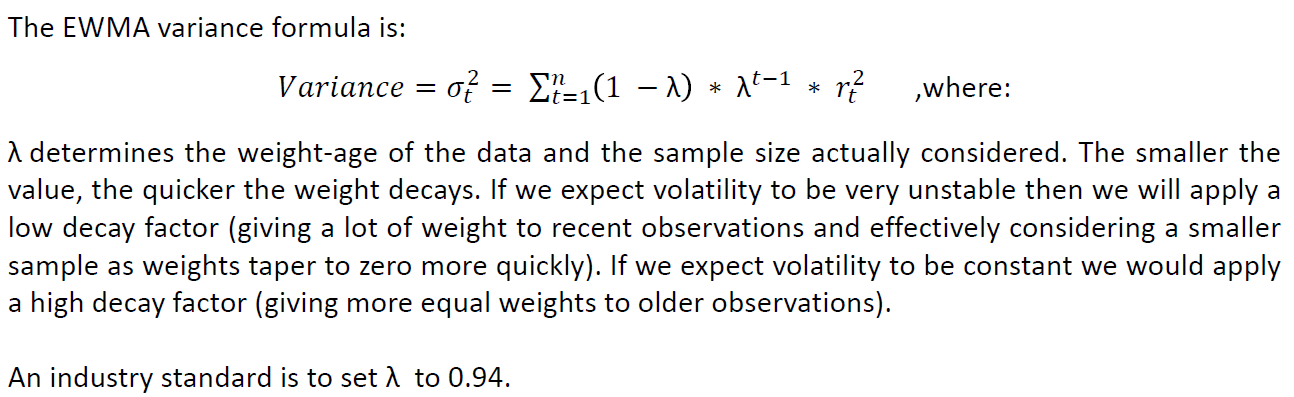

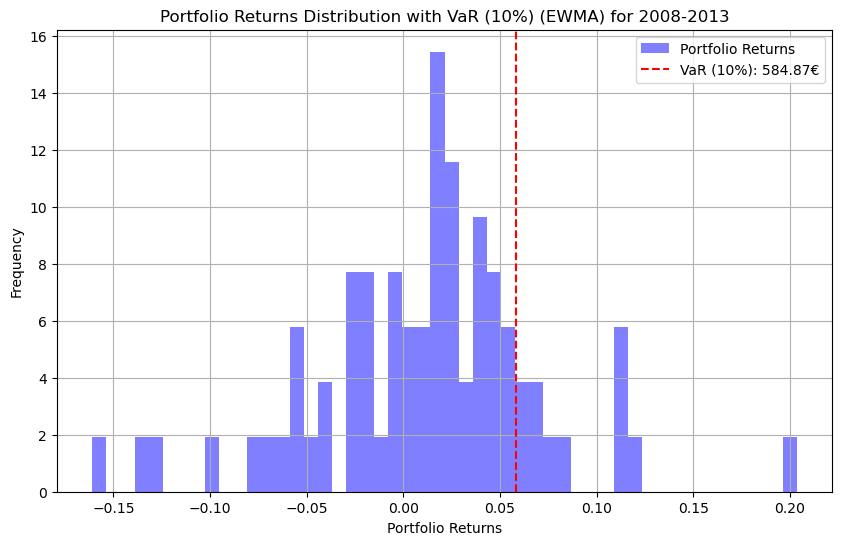

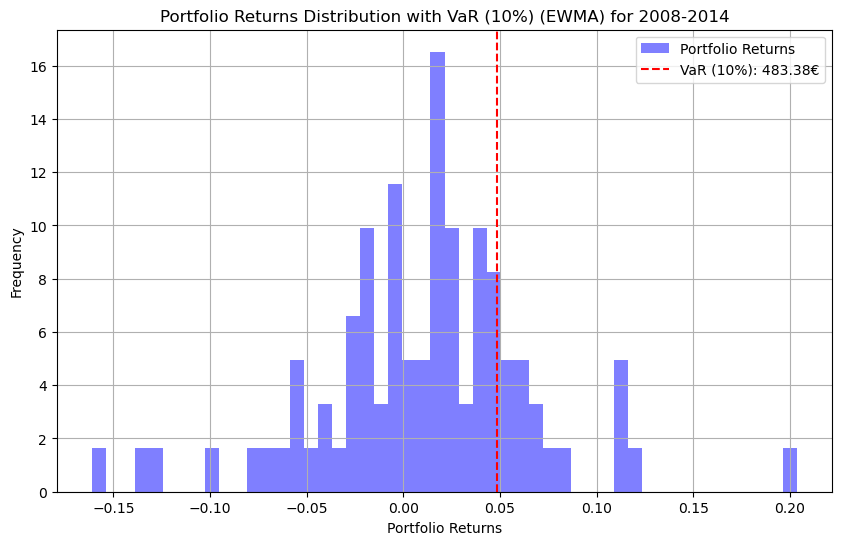

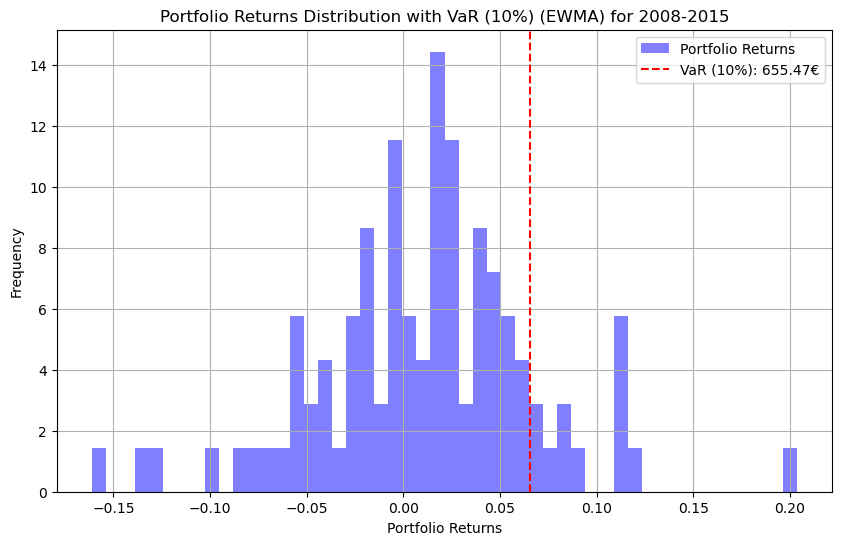

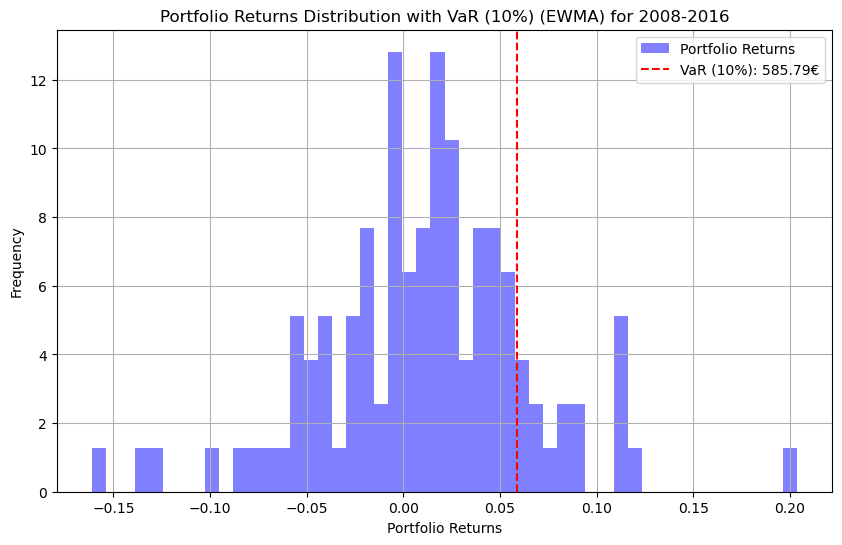

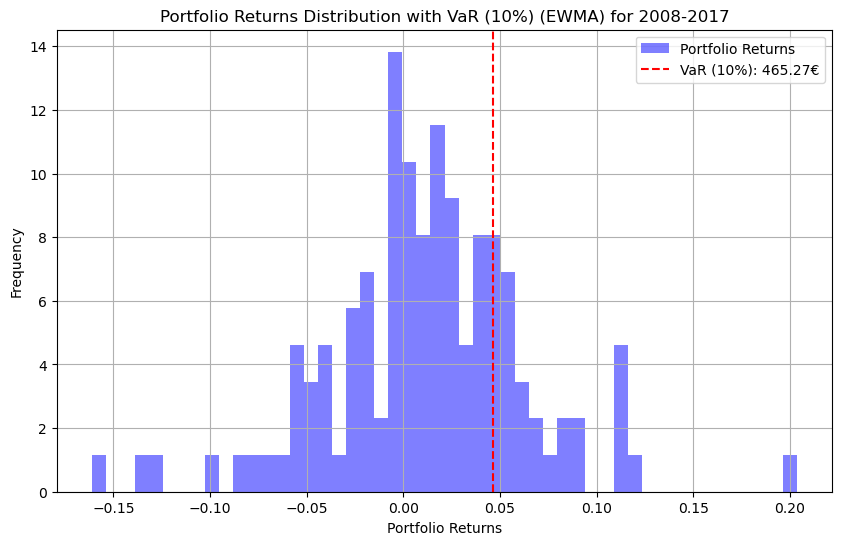

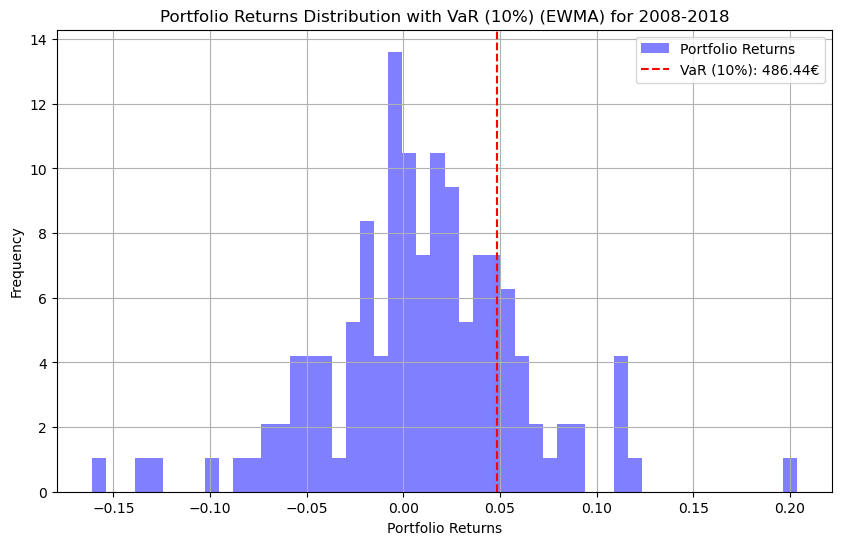

In [10]:
def calculate_EWMA_std_dev(returns, lambda_param):
    weights = np.array([(1 - lambda_param) * (lambda_param ** i) for i in range(len(returns))])[::-1]
    ewma_variance = np.sum(weights * (returns ** 2))
    ewma_std_dev = np.sqrt(ewma_variance)
    return ewma_std_dev

def compute_var_EWMA(ewma_std_dev, initial_portfolio_value, confidence_level=0.1):
    # Calculate the daily VaR at 10%
    confidence_level = 0.1
    z_value = norm.ppf(1 - confidence_level)
    var_EWMA = z_value * ewma_std_dev
    var_EWMA_eur = - var_EWMA * initial_portfolio_value
    return var_EWMA, var_EWMA_eur

# Plot the distribution of portfolio returns with VaR (10%)
def plot_distribution_with_var(portfolio_returns, var_ewma, initial_portfolio_value):
    year = portfolio_returns.index.year[-1]  # Extract the year from the index of the first row
    plt.figure(figsize=(10, 6))
    plt.hist(portfolio_returns, bins=50, density=True, alpha=0.5, color='b', label='Portfolio Returns')
    # The VaR should be a threshold indicating potential loss, ensure it's plotted correctly:
    plt.axvline(-var_ewma / initial_portfolio_value, color='r', linestyle='--',label=f'VaR (10%): {abs(var_ewma):.2f}€')
    plt.xlabel('Portfolio Returns')
    plt.ylabel('Frequency')
    plt.title('Portfolio Returns Distribution with VaR (10%) (EWMA) for 2008-'+ str(year))
    plt.legend()
    plt.grid(True)
    plt.show()
              

initial_portfolio_value = 10000  # Initial value of the portfolio
lambda_param = 0.94  # Lambda for EWMA
              
var_EWMA_list = []
var_EWMA_eur_list = []

for i, df_portfolio_returns in enumerate(df_portfolio_list, 0):
    # Calculate EWMA variance
    ewma_std_dev = calculate_EWMA_std_dev(df_portfolio_returns["Portfolio Return"], lambda_param)
    var_EWMA, var_EWMA_eur = compute_var_EWMA(ewma_std_dev, initial_portfolio_value)
    var_EWMA_list.append(var_EWMA)
    var_EWMA_eur_list.append(var_EWMA_eur)
    plot_distribution_with_var(df_portfolio_returns["Portfolio Return"], var_EWMA_eur, initial_portfolio_value)
    print("\n\n") 

### Comments

The histogram illustrates the distribution of portfolio returns using the EWMA approach, while the red dashed line represents the VaR at a 90% confidence level.
The VaR(10%) indicates the potential loss threshold that is not expected to be exceeded with a 10% probability over the specified holding period.
The lambda parameter for EWMA is set to 0.94.
For example, the monthly VaR(10%) using EWMA is €584.37€

# Non parametric approach using historical simulation

Value at Risk (VaR) is estimated directly from the data without deriving parameters or making assumptions about the entire distribution of the data. This methodology is based on the premise that the pattern of historical returns is indicative of future returns.

The easiest way to calculate the X% monthly VaR using the historical method is to accumulate a number of past returns, rank the returns from highest to lowest, and identify the lowest X% of returns. The highest of these lowest X% of returns is the 1-month, X% VaR.

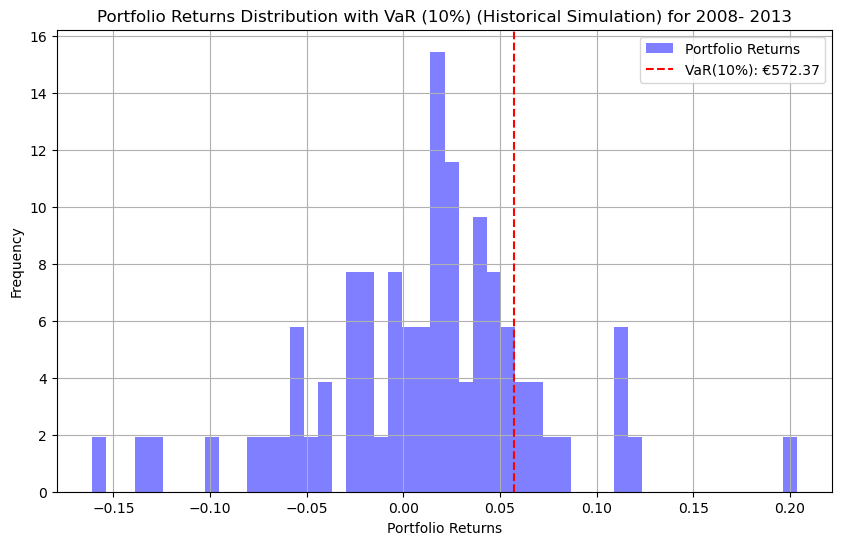

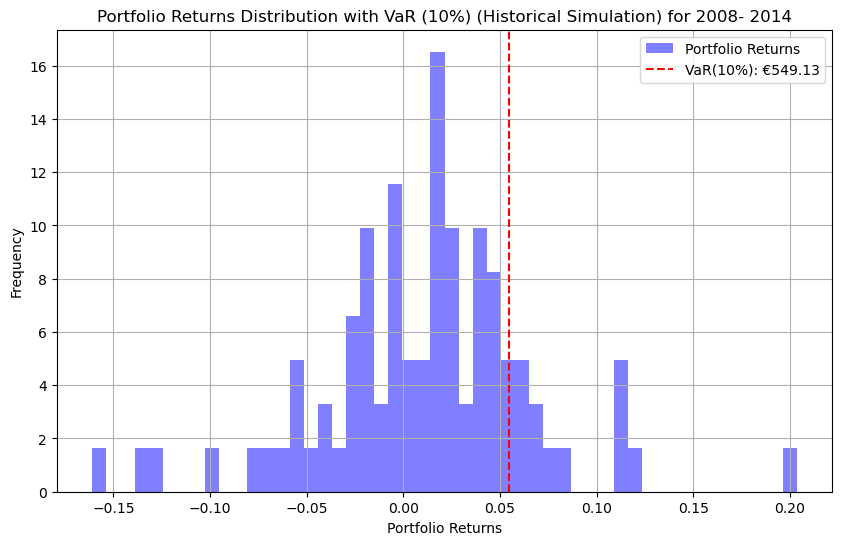

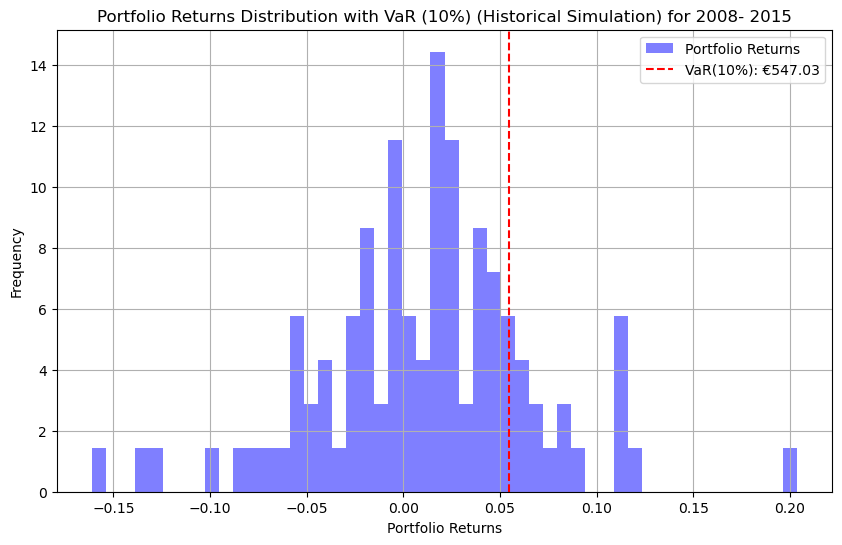

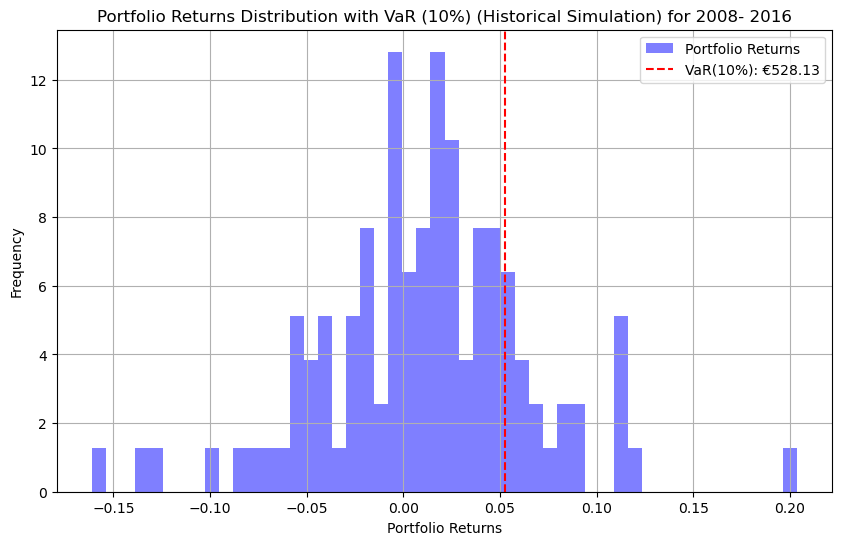

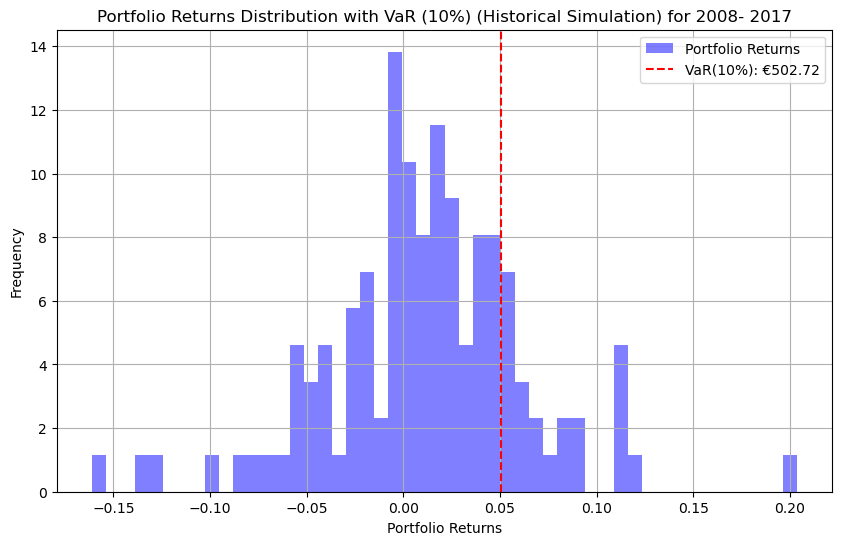

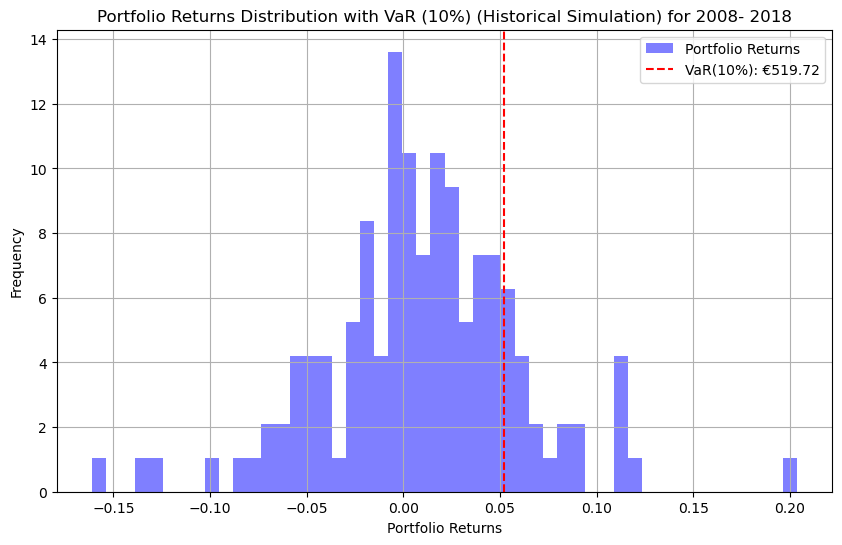

In [11]:
def compute_historical_var(portfolio_returns, initial_portfolio_value, confidence_level):
    histo_var = -np.quantile(portfolio_returns, confidence_level)
    # Convert VaR percentage to monetary value based on the initial portfolio value
    histo_var_euros = histo_var * initial_portfolio_value
    
    return histo_var, histo_var_euros
    
# Plot the distribution of portfolio returns
def plot_distribution(portfolio_returns, historical_var_euros, histo_var):
    year = portfolio_returns.index.year[-1]  # Extract the year from the index of the first row
    plt.figure(figsize=(10, 6))
    plt.hist(portfolio_returns, bins=50, density=True, alpha=0.5, color='b', label='Portfolio Returns')
    plt.axvline(histo_var, color='r', linestyle='--', label=f'VaR(10%): €{abs(historical_var_euros):.2f}')
    plt.xlabel('Portfolio Returns')
    plt.ylabel('Frequency')
    plt.title('Portfolio Returns Distribution with VaR (10%) (Historical Simulation) for 2008- '+ str(year))
    plt.legend()
    plt.grid(True)
    plt.show()

# histo_var, histo_var_euros = compute_historical_var(unstressed_portfolio_daily_returns["returns"], initial_portfolio_value, confidence_level)

# plot_distribution(unstressed_portfolio_daily_returns["returns"], histo_var_euros, histo_var)


# Calculate the historical simulation VaR at 10% confidence level
confidence_level = 0.1

initial_portfolio_value = 10000

var_histo_list = list()
var_histo_eur_list = list()

for i, df_portfolio_returns in enumerate(df_portfolio_list, 0):
    var_histo, var_histo_eur = compute_historical_var(df_portfolio_returns, initial_portfolio_value, confidence_level)
    var_histo_list.append(var_histo)
    var_histo_eur_list.append(var_histo_eur)
    plot_distribution(df_portfolio_returns, var_histo_eur, var_histo)
    print("\n\n")   

The 10% historical simulation VaR is €572.37 for 2008-2013, which means that with 90% confidence, we expect that our portfolio will not lose more than this amount in a given month.

### Monte Carlo  

The Monte Carlo method, which consists in generating a large number of different simulations of portfolio asset returns following a certain distribution law, and calculating the VaR for each of these different simulations. By averaging the VaR of a large number of each scenario, we get a greater precision thanks to the Central Limit Theorem. In fact this technique relies on adding randomness and thus achieve greater precision and confidence in VaR calculations. On the other hand, this technique is very costly in terms of computing power. 

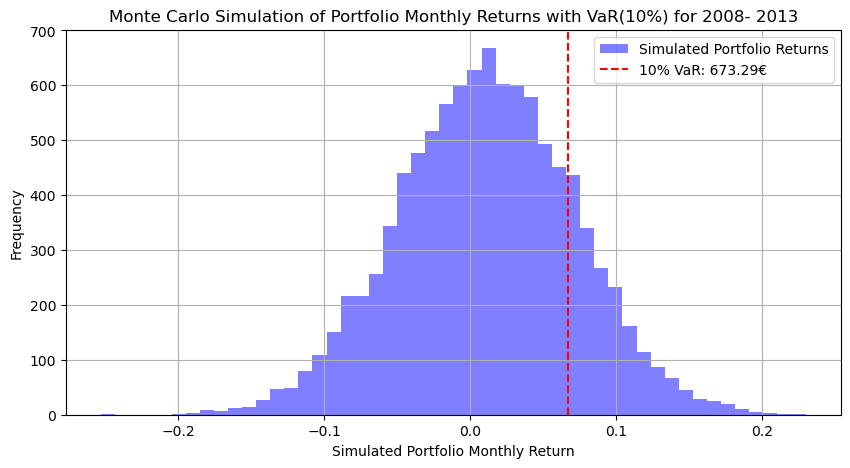

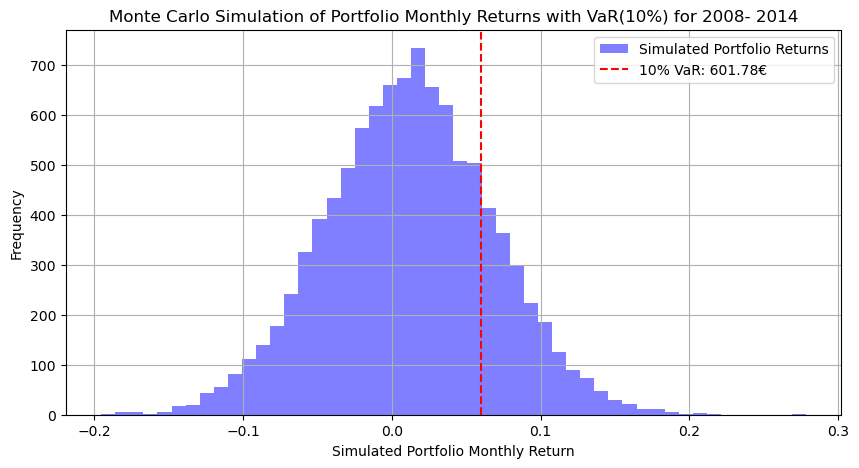

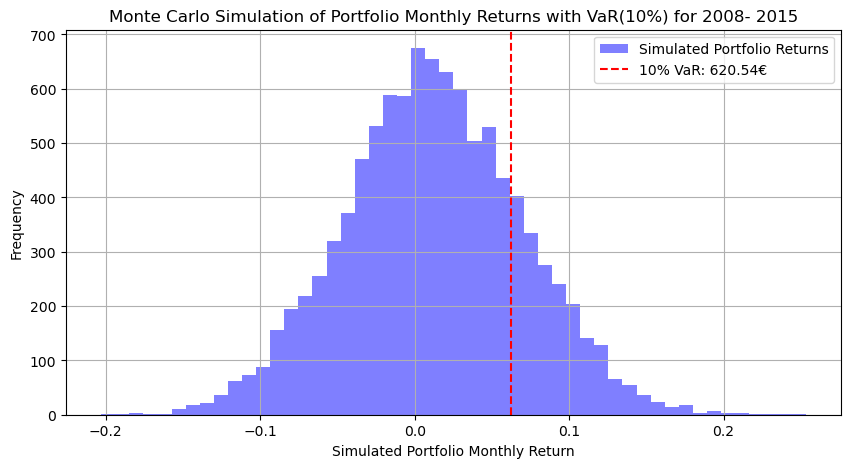

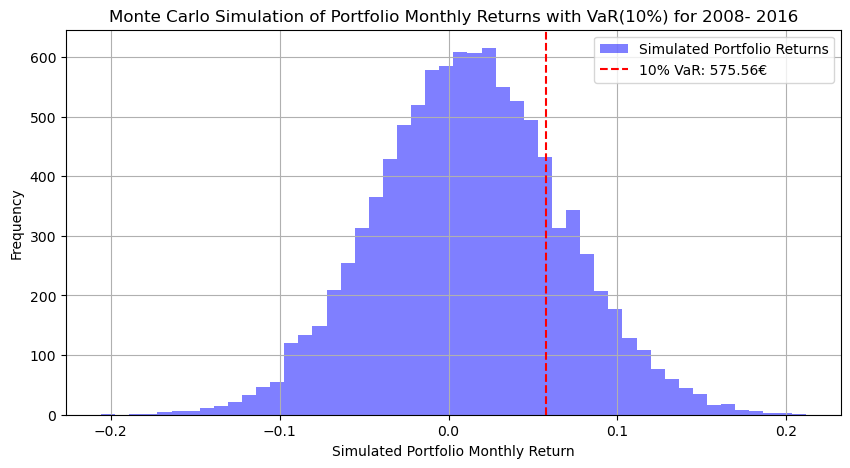

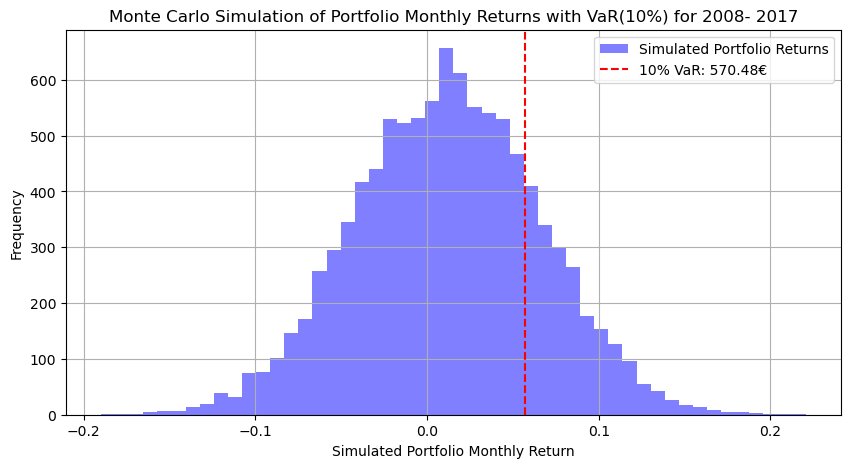

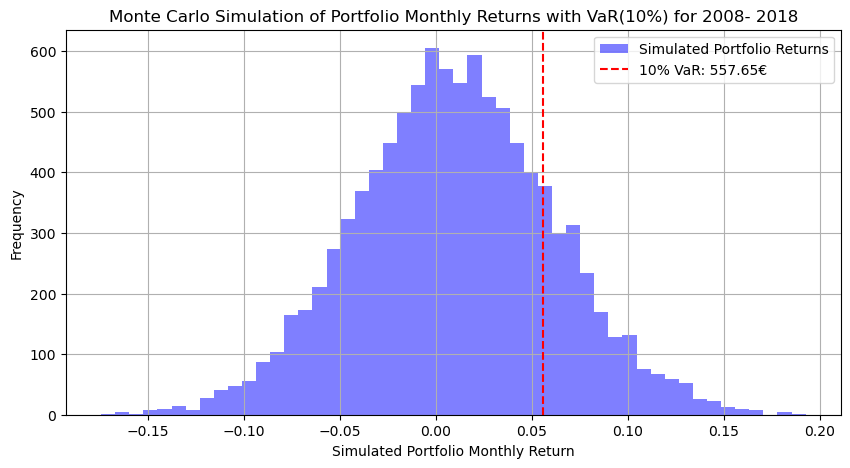

In [12]:
def monter_carlo_var(portfolio_returns, portfolio_volatility, initial_portfolio_value, time_horizon, n_simulations, confidence_level):

    # Simulate daily returns using the mean and volatility of the portfolio returns
    simulated_monthly_returns = np.random.normal(portfolio_returns.mean(), portfolio_volatility, (n_simulations, time_horizon))

    # Calculate the VaR at the 10th percentile
    var_monte_carlo = -np.quantile(simulated_monthly_returns, confidence_level)
    var_monte_carlo_eur = var_monte_carlo * initial_portfolio_value
    return var_monte_carlo, var_monte_carlo_eur, simulated_monthly_returns

#var_monte_carlo, var_monte_carlo_eur, simulated_daily_returns = monter_carlo_var(unstressed_portfolio_daily_returns["returns"], unstressed_portfolio_vol, initial_portfolio_value, time_horizon, n_simulations, confidence_level)

def plot_distribution(df_portfolio_returns, var_monte_carlo_eur, var_monte_carlo):
    # Plot the histogram of the simulated daily returns
    year = df_portfolio_returns.index.year[-1]  # Extract the year from the index of the first row

    plt.figure(figsize=(10, 5))
    plt.hist(simulated_monthly_returns, bins=50, alpha=0.5, color='blue', label='Simulated Portfolio Returns')
    plt.axvline(x=var_monte_carlo, color='red', linestyle='--', label=f'10% VaR: {var_monte_carlo_eur:.2f}€')
    plt.title('Monte Carlo Simulation of Portfolio Monthly Returns with VaR(10%) for 2008- ' + str(year))
    plt.xlabel('Simulated Portfolio Monthly Return')
    plt.ylabel('Frequency')
    plt.legend()
    plt.grid(True)
    plt.show()

# Number of simulations
n_simulations = 10000
# monthly simulations
time_horizon = 1 
confidence_level = 0.1
initial_portfolio_value = 10000

var_monte_carlo_list = list()
var_monte_carlo_eur_list = list()

for i, df_portfolio_returns in enumerate(df_portfolio_list, 0):
    var_monte_carlo, var_monte_carlo_eur, simulated_monthly_returns = monter_carlo_var(df_portfolio_returns, vol_portfolio_list[i], initial_portfolio_value, time_horizon, n_simulations, confidence_level)
    var_monte_carlo_list.append(var_monte_carlo)
    var_monte_carlo_eur_list.append(var_monte_carlo_eur)
    plot_distribution(df_portfolio_returns, var_monte_carlo_eur, var_monte_carlo)
    print("\n\n")   

## Comparison of the different models 

If we focus on the period 2008-2013, the SMA (Simple Moving Average) approach gives a VaR of €176.36, the EWMA (Exponentially Weighted Moving Average) gives a VaR of €121.97, the historical simulation method gives a VaR of €157.62, the hybrid approach yields a VaR of €143.34, and the Monte Carlo simulation approach yields a VaR of €167.69.

The SMA method gives equal weight to all observations in the look-back period, so this method might not be as responsive to recent market changes. 

In contrast, EWMA gives more weight to more recent returns, which can result in a lower VaR if recent market volatiliry is less than the long-term average. 

The historical simulation method does not assume a normal distribution and instead uses actual historical returns to calculate VaR, which can lead to different results if the historical data has outliers or is not symmetrically distributed.

The hybrid method typically combines elements of both historical simulation and a parametric approach, which might balance out the extremes of each individual method.

The Monte Carlo simulation approach relies on the statistical properties (mean and variance) of the simulated returns and might produce a VaR that reflects the modeled assumptions more than the actual historical data.

Across all methods, a VaR(10%) means there is a 90% confidence that losses will not exceed the calculated VaR on any given day. However, there is a 10% chance that losses could exceed this amount, indicating the tail risk.

The choice of λ (lambda) in EWMA affects sensitivity to recent market moves. A λ close to 1 (like 0.94) puts less weight on the most recent returns, which might underestimate risk if the market becomes more volatile.

Lower VaR figures might indicate a method that is not capturing risk adequately, especially in turbulent markets, while a higher VaR suggests a more conservative approach to risk estimation.
Risk managers might prefer a method that aligns with their risk appetite and reflects the market conditions they expect to face.

To sum up: 

#### 1. SMA (Simple Moving Average):

- Tends to give a higher VaR, indicating a more conservative approach to risk.
- Assumes equal weight to historical data, which may not be responsive to recent market trends or volatility spikes.
- Might be preferred if the goal is to maintain a conservative stance and the market conditions have been stable or the historical period used is representative of current conditions.

#### 2. EWMA (Exponentially Weighted Moving Average):

- Gives more weight to recent data, potentially making it more responsive to recent market volatility.
- A lower VaR might suggest it's less conservative, which could be preferable in a stable market or if recent data is more reflective of current conditions.
- The choice of the lambda parameter is crucial; λ=0.94 implies a slow decay, meaning it still considers relatively old observations quite strongly.

#### 3. Historical Simulation:

- Does not assume a normal distribution and uses actual historical data, which can capture events like market crashes or booms.
- May be preferable if you believe that the historical data contains relevant scenarios that could occur again.

#### 4. Hybrid Approach:

- Combines elements of both historical simulation and parametric models.
- Might offer a balance between responsiveness to market conditions and a conservative stance.
- Could be considered more robust as it doesn't rely solely on one type of data or method.

#### 5. Monte Carlo Simulation:

- Based on statistical properties of the portfolio and allows for the modeling of various scenarios, including atypical events.
- Can be tuned to model complex instruments or portfolios that do not follow standard market patterns.
- Often preferred if the portfolio contains complex derivatives or non-linear instruments.
- One drawback of this methids is that it's highly cost computational

### CVaR(5%) non-parametric approach (historical approach)

To derive the CVaR from the non-parametric approach, first we have to compute the VaR at the confidence level of 95% (because we want to compute the CVaR(5%)) using the `quantile` function from the python numpy library. Then, by calculating the average of all returns less than or equal to the VaR(5%), we can calculate the CVaR(5%). This means that the CVaR will always be less than the VaR for the same quantile.

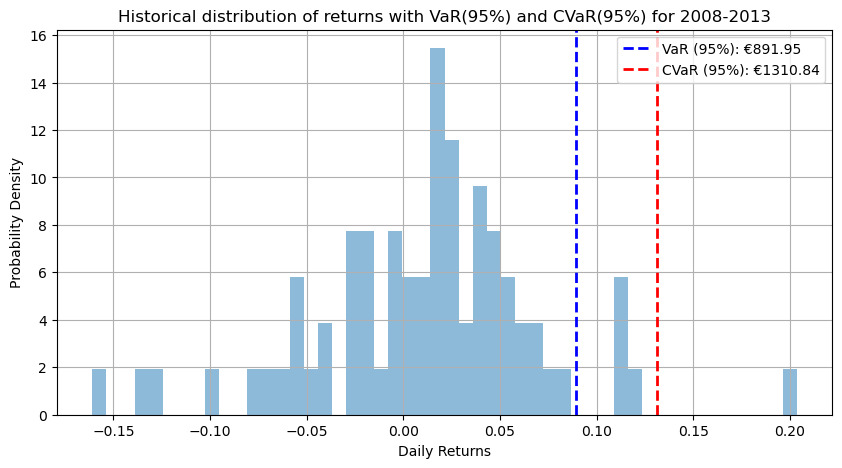

VaR(95%): 0.08919467975603078
CVaR(95%) 0.13108390483610666





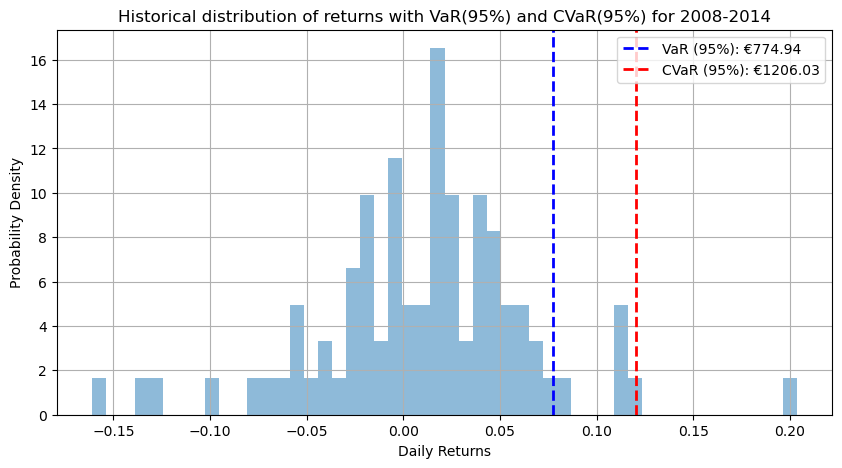

VaR(95%): 0.07749404791915472
CVaR(95%) 0.1206026338708223





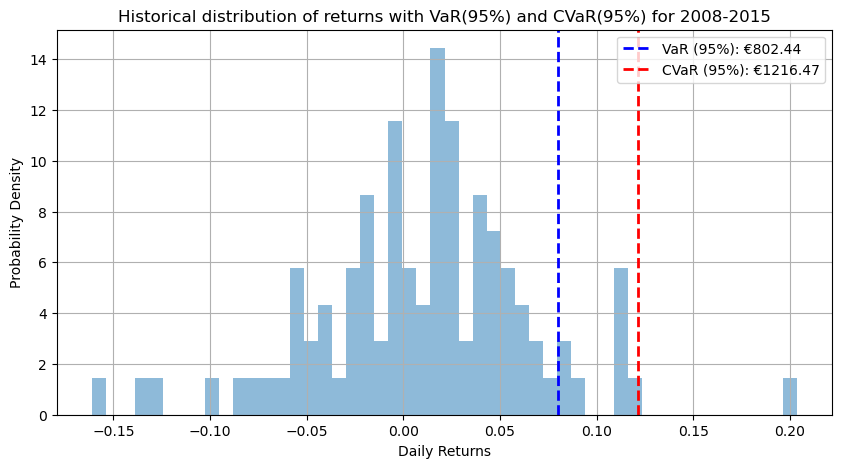

VaR(95%): 0.08024376745255432
CVaR(95%) 0.1216467788327353





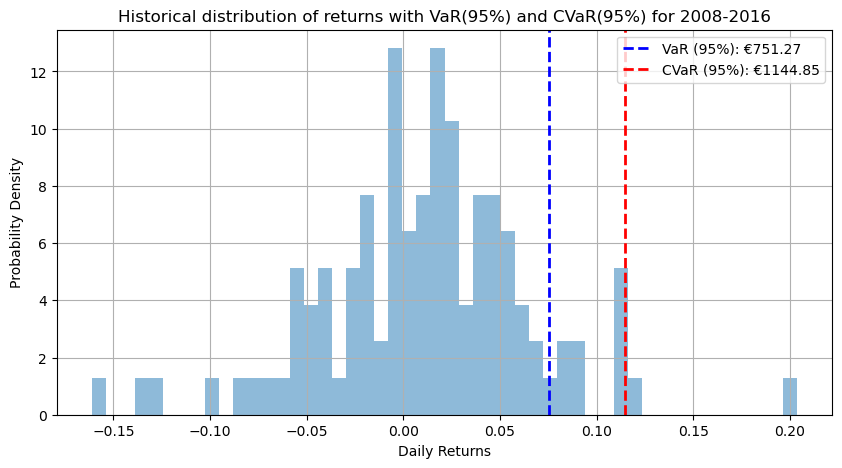

VaR(95%): 0.07512704373809449
CVaR(95%) 0.11448524069556022





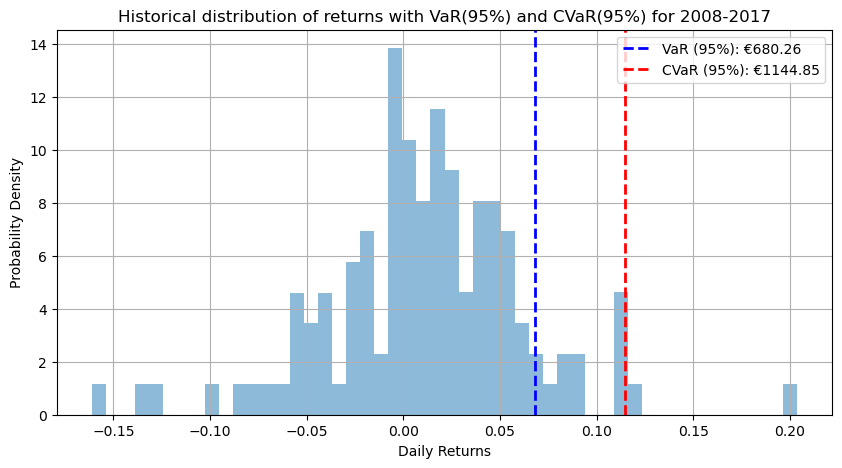

VaR(95%): 0.06802603119491382
CVaR(95%) 0.11448524069556022





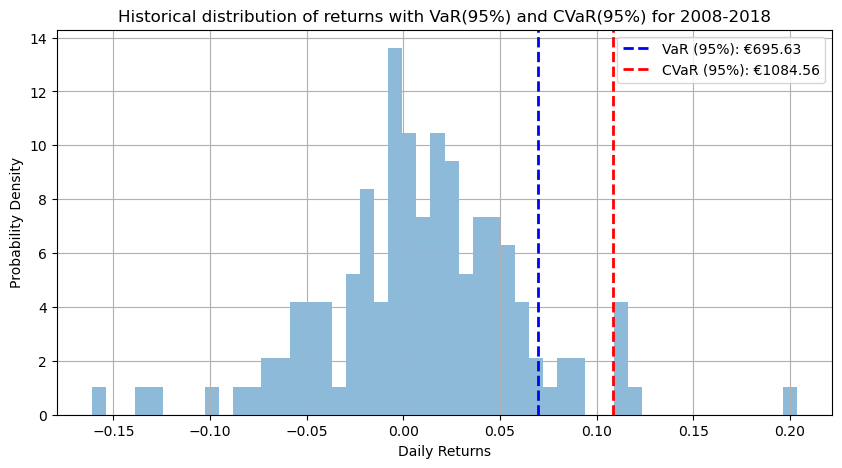

VaR(95%): 0.06956322189691526
CVaR(95%) 0.10845647983754403





In [13]:
def compute_cvar_non_param(portfolio_returns, initial_portfolio_value, confidence_level):
    var_non_param_ = -np.quantile(portfolio_returns, 1 - confidence_level)
    cvar_non_param_ = -portfolio_returns[portfolio_returns <= -var_non_param_].mean()
    
    var_non_param_eur_ = var_non_param_ * initial_portfolio_value
    cvar_non_param_eur_ = cvar_non_param_ * initial_portfolio_value
    
    year = portfolio_returns.index.year[-1]  # Extract the year from the index of the first row
    plt.figure(figsize=(10, 5))
    plt.hist(portfolio_returns, bins=50, alpha=0.5, density=True, stacked=True)
    
    plt.axvline(var_non_param_, color='blue', linestyle='dashed', linewidth=2, label=f'VaR (95%): €{var_non_param_eur_:.2f}')
    plt.axvline(cvar_non_param_, color='red', linestyle='dashed', linewidth=2, label=f'CVaR (95%): €{cvar_non_param_eur_:.2f}')
    plt.legend(loc='upper right')
    plt.title("Historical distribution of returns with VaR(95%) and CVaR(95%) for 2008-" + str(year))
    plt.xlabel("Daily Returns")
    plt.ylabel("Probability Density")
    plt.grid(True)
    plt.show()
    
    print("VaR(95%):", var_non_param_)
    print("CVaR(95%)", cvar_non_param_)

    return var_non_param_, cvar_non_param_, var_non_param_eur_, cvar_non_param_eur_


initial_portfolio_value = 10000
confidence_level = 0.95

var_non_param_list_ = list()
var_non_param_eur_list_ = list()
cvar_non_param_list_ = list()
cvar_non_param_eur_list_ = list()

for i, df_portfolio_returns in enumerate(df_portfolio_list, 0):
    var_non_param_, cvar_non_param_, var_non_param_eur_, cvar_non_param_eur_  = compute_cvar_non_param(df_portfolio_returns["Portfolio Return"], initial_portfolio_value, confidence_level)
    var_non_param_list_.append(var_non_param_)
    var_non_param_eur_list_.append(var_non_param_eur_)
    cvar_non_param_list_.append(cvar_non_param_)
    cvar_non_param_eur_list_.append(cvar_non_param_eur_)
    print("\n\n")   

### CVaR parametric approach

To calculate the CVaR, first we specify the confidence level (in the case 0.95). Next, we need to specify the return distribution sample. In this parametric approach as we know the distribution we calculate the VaR at this confidence level, using the `.ppf()` method of the `norm` object in order to obtain the z-value at confidence level of 95%. We could also have used the quantile method on losses, if we wished, but the percentage point function is very useful when the distribution is known. VaR is used as a lower bound to find the expected value of the tail loss. As we suppose that our return are normally distributed, the `.expect()` method attached to the `norm` object will calculate the CVaR. If the return are not normally distributed, the expected value is calculated using the integral show below, in the CVaR definition.

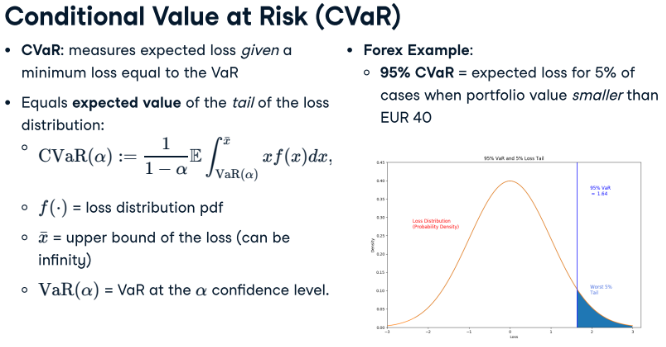

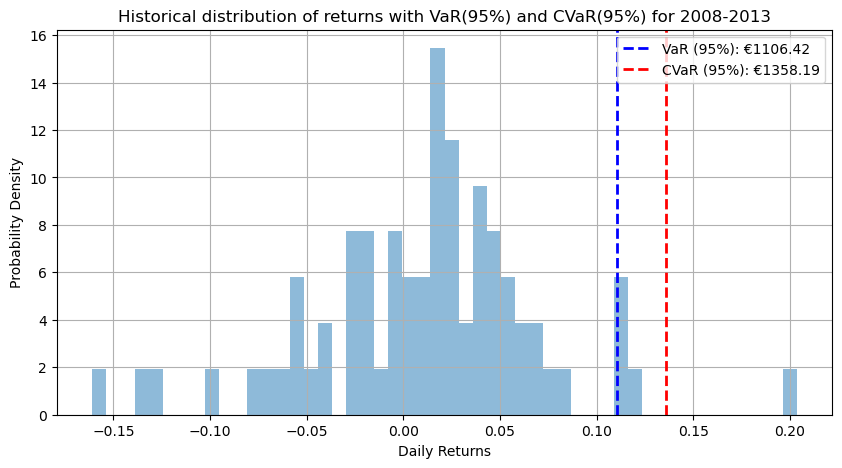

VaR(95%): 0.11064217616083913
CVaR(95%) 0.1358185373758203





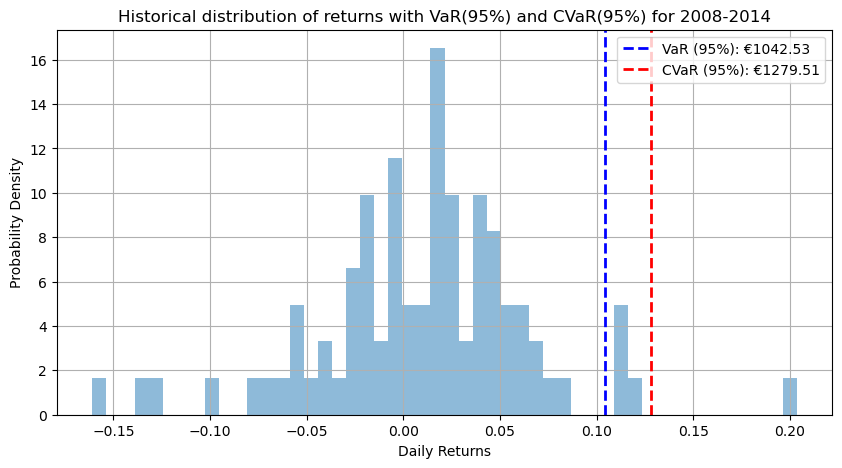

VaR(95%): 0.10425287121786343
CVaR(95%) 0.1279508506934676





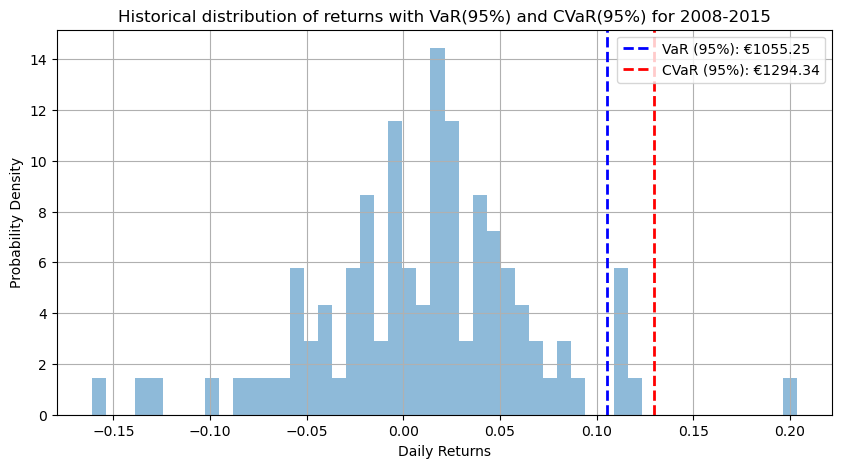

VaR(95%): 0.10552485635146291
CVaR(95%) 0.12943365907190785





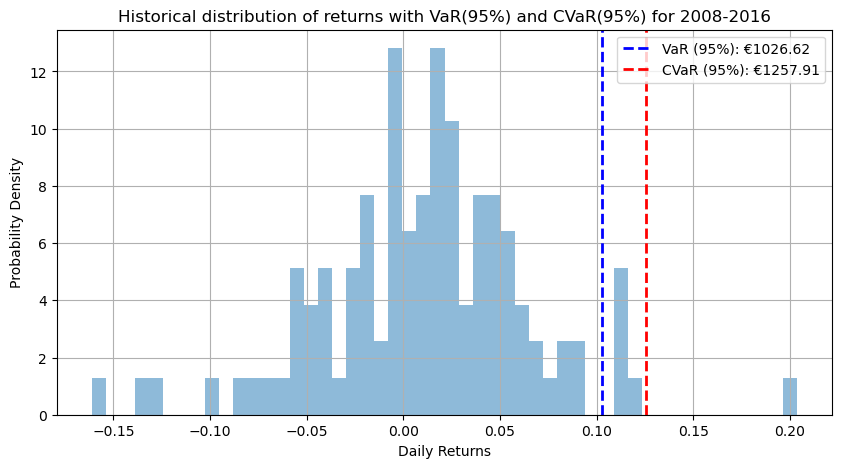

VaR(95%): 0.10266197017484151
CVaR(95%) 0.12579116834949516





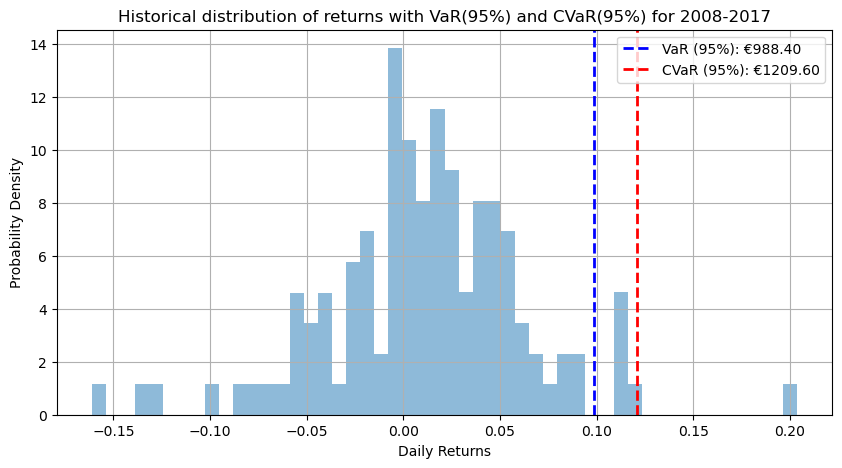

VaR(95%): 0.09883991264672931
CVaR(95%) 0.1209596526183017





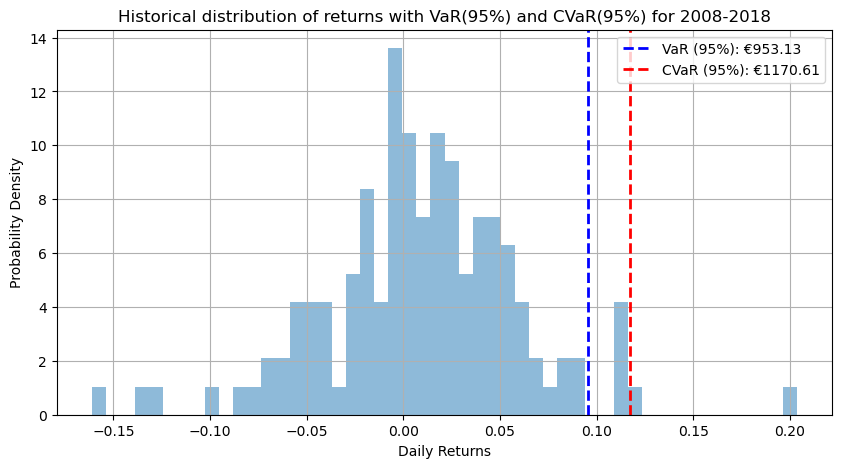

VaR(95%): 0.09531293806418209
CVaR(95%) 0.11706130433414123





In [14]:
def compute_cvar_param(portfolio_returns, initial_portfolio_value, confidence_level):
    
    portfolio_returns_mean = portfolio_returns.mean()
    portfolio_std = portfolio_returns.std()
    
    var_param_ = norm.ppf(confidence_level, loc=portfolio_returns_mean, scale=portfolio_std)
    tail_loss = norm.expect(lambda x: x, loc=portfolio_returns_mean, scale=portfolio_std, lb=var_param_)
    cvar_param_ = (1 / (1 - confidence_level)) * tail_loss
    
    var_param_eur_ = var_param_ * initial_portfolio_value
    cvar_param_eur_ = cvar_param_ * initial_portfolio_value
    
    year = portfolio_returns.index.year[-1]  # Extract the year from the index of the first row
    plt.figure(figsize=(10, 5))
    plt.hist(portfolio_returns,bins=50, alpha=0.5, density=True, stacked=True)
    
    plt.axvline(var_param_, color='blue', linestyle='dashed', linewidth=2, label=f'VaR (95%): €{var_param_eur_:.2f}')
    plt.axvline(cvar_param_, color='red', linestyle='dashed', linewidth=2, label=f'CVaR (95%): €{cvar_param_eur_:.2f}')
    plt.legend(loc='upper right')
    plt.title("Historical distribution of returns with VaR(95%) and CVaR(95%) for 2008-" + str(year))
    plt.xlabel("Daily Returns")
    plt.ylabel("Probability Density")
    plt.grid(True)
    plt.show()
    
    print("VaR(95%):", var_param_)
    print("CVaR(95%)", cvar_param_)
    
    return var_param_, cvar_param_, var_param_eur_, cvar_param_eur_

initial_portfolio_value = 10000
confidence_level = 0.95

var_param_list_ = list()
var_param_eur_list_ = list()
cvar_param_list_ = list()
cvar_param_eur_list_ = list()

for i, df_portfolio_returns in enumerate(df_portfolio_list, 0):
    var_param_, cvar_param_, var_param_eur_, cvar_param_eur_  = compute_cvar_param(df_portfolio_returns["Portfolio Return"], initial_portfolio_value, confidence_level)
    var_param_list_.append(var_param_)
    var_param_eur_list_.append(var_param_eur_)
    cvar_param_list_.append(cvar_param_)
    cvar_param_eur_list_.append(cvar_param_eur_)
    print("\n\n")  